In [97]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [99]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [100]:
match1 = df2[(df2['team1'] == 'Chennai Super Kings') & (df2['team2'] == 'Sunrisers Hyderabad')]
match2 = df2[(df2['team1'] == 'Sunrisers Hyderabad') & (df2['team2'] == 'Chennai Super Kings')]

Match1 = Chennai Home Ground

Match2 = Hyderabad Home Ground

# Overall Hyderabad vs Chennai:

In [101]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date                team1  \
434    435    2013  Hyderabad  2013-05-08  Chennai Super Kings   
506    507    2014     Ranchi  2014-05-22  Chennai Super Kings   
520    521    2015    Chennai  2015-04-11  Chennai Super Kings   
655   7913    2018  Hyderabad    22/04/18  Chennai Super Kings   
728  11324    2019  Hyderabad    17/04/19  Chennai Super Kings   

                   team2          toss_winner toss_decision  result  \
434  Sunrisers Hyderabad  Sunrisers Hyderabad         field  normal   
506  Sunrisers Hyderabad  Sunrisers Hyderabad         field  normal   
520  Sunrisers Hyderabad  Chennai Super Kings           bat  normal   
655  Sunrisers Hyderabad  Sunrisers Hyderabad         field  normal   
728  Sunrisers Hyderabad  Chennai Super Kings           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
434           0  Chennai Super Kings           77               0   
506           0  Sunrisers Hyderabad            0               6   
520           0  Chennai Super Kings           45               0   
655           0  Chennai Super Kings            4               0   
728           0  Sunrisers Hyderabad            0               6   

    player_of_match                                      venue  \
434        SK Raina  Rajiv Gandhi International Stadium, Uppal   
506       DA Warner         JSCA International Stadium Complex   
520     BB McCullum            MA Chidambaram Stadium, Chepauk   
655       AT Rayudu  Rajiv Gandhi International Stadium, Uppal   
728       DA Warner         Rajiv Gandhi Intl. Cricket Stadium   

            umpire1          umpire2        umpire3  
434           S Das         NJ Llong            NaN  
506    BNJ Oxenford    C Shamshuddin            NaN  
520  RK Illingworth      VA Kulkarni            NaN  
655  Anil Chaudhary  Vineet Kulkarni    Nigel Llong  
728       Ian Gould     Ulhas Gandhe  C Shamshuddin

Matches played between Hyderabad and Chennai

In [102]:
match.shape

(12, 18)

In [103]:
match['winner'].value_counts()

Chennai Super Kings    9
Sunrisers Hyderabad    3
Name: winner, dtype: int64

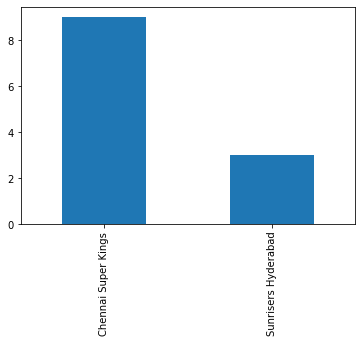

In [104]:
match['winner'].value_counts().plot.bar()
plt.show()

Chennai won 9 times and Hyderabad won 3 times against each other.

In [105]:
match['toss_winner'].value_counts()

Chennai Super Kings    7
Sunrisers Hyderabad    5
Name: toss_winner, dtype: int64

In [106]:
match['toss_decision'].value_counts()

field    8
bat      4
Name: toss_decision, dtype: int64

In [107]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Chennai Super Kings    5
Sunrisers Hyderabad    1
Name: winner, dtype: int64

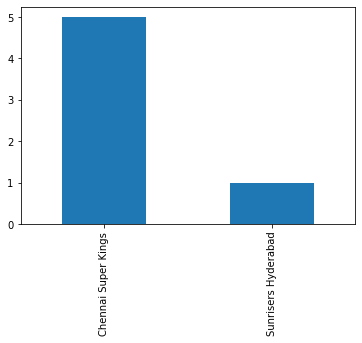

In [108]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Chennai won the toss and won the match 5 times, whereas Hyderabad won 1 time.

In [109]:
ids = list(match['id'])
ids1 = list(match2['id'])
delivery = df1[(df1['match_id'] == ids[0]) | (df1['match_id'] == ids[1]) | (df1['match_id'] == ids[2]) | (df1['match_id'] == ids[3]) | (df1['match_id'] == ids[4]) | (df1['match_id'] == ids[5]) | (df1['match_id'] == ids[6]) | (df1['match_id'] == ids[7]) | (df1['match_id'] == ids[8]) | (df1['match_id'] == ids[9]) | (df1['match_id'] == ids[10]) | (df1['match_id'] == ids[11])]
delivery.head()

match_id  inning         batting_team         bowling_team  over  ball  \
97960       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     1   
97961       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     2   
97962       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     3   
97963       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     4   
97964       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     5   

         batsman non_striker     bowler  is_super_over  ...  bye_runs  \
97960  Q de Kock    S Dhawan  MM Sharma              0  ...         0   
97961  Q de Kock    S Dhawan  MM Sharma              0  ...         0   
97962  Q de Kock    S Dhawan  MM Sharma              0  ...         0   
97963  GH Vihari    S Dhawan  MM Sharma              0  ...         0   
97964  GH Vihari    S Dhawan  MM Sharma              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
97960            0            0             0             0           0   
97961            0            0             0             4           0   
97962            0            0             0             0           0   
97963            0            0             0             0           0   
97964            0            0             0             1           0   

       total_runs  player_dismissed dismissal_kind  fielder  
97960           0               NaN            NaN      NaN  
97961           4               NaN            NaN      NaN  
97962           0         Q de Kock         caught  M Vijay  
97963           0               NaN            NaN      NaN  
97964           1               NaN            NaN      NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Hyderabad and Chennai.

In [110]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## David Warner playing for Hyderabad:

In [111]:
total_run_David_Warner_srh = delivery[delivery['batsman'] == 'DA Warner']['batsman_runs'].sum()
total_run_David_Warner_srh

314

David Warner for Hyderabad scored 314 runs against Chennai.

In [112]:
total_matches_against_Chennai_for_Hyderabad = len(delivery[delivery['batsman'] == 'DA Warner']['match_id'].value_counts())
total_matches_against_Chennai_for_Hyderabad

6

Total matches played against Chennai and being in Hyderabad.

In [113]:
avg_run_David_Warner_srh = math.ceil(total_run_David_Warner_srh/total_matches_against_Chennai_for_Hyderabad)
avg_run_David_Warner_srh

53

David Warner scored an average of 53 per match for Hyderabad against Chennai.

In [114]:
total_run_David_Warner_batting_first_srh = delivery[(delivery['batsman'] == 'DA Warner') & (delivery['inning']==1)]['batsman_runs'].sum()
total_run_David_Warner_batting_first_srh

120

David Warner scored 120 runs while batting in first inning.

In [115]:
total_matches_against_Chennai_for_Hyderabad_first_inning = len(delivery[(delivery['batsman'] == 'DA Warner') & (delivery['inning'] == 1)]['match_id'].value_counts())
total_matches_against_Chennai_for_Hyderabad_first_inning

3

Total innings played for Hyderabad against Chennai batting first.

In [116]:
avg_run_David_Warner_srh_first_inning = math.ceil(total_run_David_Warner_batting_first_srh/total_matches_against_Chennai_for_Hyderabad_first_inning)
avg_run_David_Warner_srh_first_inning

40

David Warner scored an average of 40 per match for Hyderabad against Chennai batting first.

In [117]:
total_run_David_Warner_batting_second_srh = delivery[(delivery['batsman'] == 'DA Warner') & (delivery['inning']==2)]['batsman_runs'].sum()
total_run_David_Warner_batting_second_srh

194

David Warner scored 194 runs while batting in second inning.

In [118]:
total_matches_against_Chennai_for_Hyderabad_second_inning = len(delivery[(delivery['batsman'] == 'DA Warner') & (delivery['inning'] == 2)]['match_id'].value_counts())
total_matches_against_Chennai_for_Hyderabad_second_inning

3

Total innings played for Hyderabad against Chennai batting second.

In [119]:
avg_run_David_Warner_srh_second_inning = math.ceil(total_run_David_Warner_batting_second_srh/total_matches_against_Chennai_for_Hyderabad_second_inning)
avg_run_David_Warner_srh_second_inning

65

David Warner scored an average of 65 per match for Hyderabad against Chennai batting second.

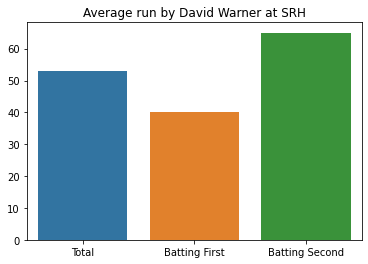

In [120]:
average_runs_srh = pd.Series([avg_run_David_Warner_srh,avg_run_David_Warner_srh_first_inning,avg_run_David_Warner_srh_second_inning],index=['Total','Batting First','Batting Second'])
sns.barplot(x=average_runs_srh.index,y=average_runs_srh)
plt.title('Average run by David Warner at SRH')
plt.show()

So we can see David Warner played beter in the 2nd innings played for Hyderabad against Chennai.

## David Warner Overall:

In [121]:
total_run_David_Warner = df1[(df1['batsman'] == 'DA Warner') & (df1['bowling_team'] == 'Chennai Super Kings')]['batsman_runs'].sum()
total_run_David_Warner

448

David Warner overall scored 448 runs against Chennai.

In [122]:
total_matches_against_Chennai = len(df1[(df1['batsman'] == 'DA Warner') & (df1['bowling_team'] == 'Chennai Super Kings')]['match_id'].value_counts())
total_matches_against_Chennai

14

Total matches played against Chennai.

In [123]:
avg_run_David_Warner = math.ceil(total_run_David_Warner/total_matches_against_Chennai)
avg_run_David_Warner

32

32 runs per match in an average.

In [124]:
total_run_David_Warner_batting_first = df1[(df1['batsman'] == 'DA Warner') & (df1['inning']==1) & (df1['bowling_team'] == 'Chennai Super Kings')]['batsman_runs'].sum()
total_run_David_Warner_batting_first

134

David Warner scored 134 runs while batting in first inning against Chennai.

In [125]:
total_matches_against_Chennai_first_inning = len(df1[(df1['batsman'] == 'DA Warner') & (df1['inning'] == 1) & (df1['bowling_team'] == 'Chennai Super Kings')]['match_id'].value_counts())
total_matches_against_Chennai_first_inning

5

Total innings played against Chennai batting first.

In [126]:
avg_run_David_Warner_batting_first = math.ceil(total_run_David_Warner_batting_first/total_matches_against_Chennai_first_inning)
avg_run_David_Warner_batting_first

27

27 runs per match in an average batting first.

In [127]:
total_run_David_Warner_batting_second = df1[(df1['batsman'] == 'DA Warner') & (df1['inning']==2) & (df1['bowling_team'] == 'Chennai Super Kings')]['batsman_runs'].sum()
total_run_David_Warner_batting_second

314

David Warner scored 314 runs while batting in second inning against Chennai.

In [128]:
total_matches_against_Chennai_second_inning = len(df1[(df1['batsman'] == 'DA Warner') & (df1['inning'] == 2) & (df1['bowling_team'] == 'Chennai Super Kings')]['match_id'].value_counts())
total_matches_against_Chennai_second_inning

9

Total innings played against Chennai batting second.

In [129]:
avg_run_David_Warner_batting_second = math.ceil(total_run_David_Warner_batting_second/total_matches_against_Chennai_second_inning)
avg_run_David_Warner_batting_second

35

35 runs per match in an average batting first.

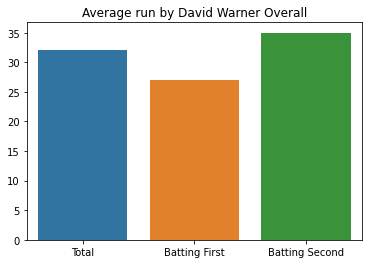

In [130]:
average_runs = pd.Series([avg_run_David_Warner,avg_run_David_Warner_batting_first,avg_run_David_Warner_batting_second],index=['Total','Batting First','Batting Second'])
sns.barplot(x=average_runs.index,y=average_runs)
plt.title('Average run by David Warner Overall')
plt.show()

So we can see David Warner played beter in the 2nd innings played against Chennai.

# Wide Balls:

In [131]:
total_wides = delivery['wide_runs'].sum()
total_wides

87

Total 87 wide balls bowled.

In [132]:
wides_by_Chennai = delivery[delivery['bowling_team'] == 'Chennai Super Kings']['wide_runs'].sum()
wides_by_Chennai

53

Chennai bowled 53 wides against Hyderabad.

In [133]:
wides_by_Hyderabad = delivery[delivery['bowling_team'] != 'Chennai Super Kings']['wide_runs'].sum()
wides_by_Hyderabad

34

Hyderabad bowled 34 wides against Chennai

In [134]:
avg_wides = math.ceil(total_wides/len(ids))
avg_wides

8

Average wides per match is 8.

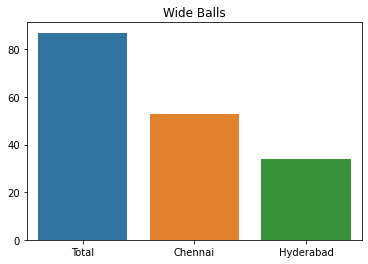

In [135]:
wides = pd.Series([total_wides,wides_by_Chennai,wides_by_Hyderabad],index=['Total','Chennai','Hyderabad'])
sns.barplot(x=wides.index,y=wides)
plt.title('Wide Balls')
plt.show()

So Chennai bowled more wide balls than Hyderabad

# Wickets:

In [136]:
total_wickets_fallen_Chennai = delivery[(delivery['batting_team'] == 'Chennai Super Kings')]['player_dismissed'].count()
total_wickets_fallen_Chennai

50

Total 50 wickets fallen of Chennai agains Hyderabad till now.

In [137]:
total_matches_against_Hyderabad = len(delivery['match_id'].value_counts())
total_matches_against_Hyderabad

12

Chennai played 12 matches against Hyderabad

In [138]:
avg_wicket_fallen_Chennai = math.ceil(total_wickets_fallen_Chennai/total_matches_against_Hyderabad)
avg_wicket_fallen_Chennai

5

Chennai lost 5 wickets in an average per match against Hyderabad.

In [139]:
total_wickets_fallen_Chennai_batting_first = delivery[(delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_fallen_Chennai_batting_first

18

Chennai lost 18 wickets against Hyderabad while batting first.

In [140]:
total_matches_batting_first_against_Hyderabad = len(delivery[(delivery['inning'] == 1) & (delivery['batting_team'] == 'Chennai Super Kings')]['match_id'].value_counts())
total_matches_batting_first_against_Hyderabad

5

Chennai batted in first innings in 5 matches against Hyderabad

In [141]:
avg_wicket_fallen_batting_first_Chennai = math.ceil(total_wickets_fallen_Chennai_batting_first/total_matches_batting_first_against_Hyderabad)
avg_wicket_fallen_batting_first_Chennai

4

Chennai lost 4 wickets in an average per match against Hyderabad while batting in first inning.

In [142]:
total_wickets_fallen_Chennai_batting_second = delivery[(delivery['batting_team'] == 'Chennai Super Kings') & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_fallen_Chennai_batting_second

32

Chennai lost 32 wickets against Hyderabad while batting second.

In [143]:
total_matches_batting_second_against_Hyderabad = len(delivery[(delivery['inning'] == 2) & (delivery['batting_team'] == 'Chennai Super Kings')]['match_id'].value_counts())
total_matches_batting_second_against_Hyderabad

7

Chennai batted in second innings in 7 matches against Hyderabad.

In [144]:
avg_wicket_fallen_batting_second_Chennai = math.ceil(total_wickets_fallen_Chennai_batting_second/total_matches_batting_second_against_Hyderabad)
avg_wicket_fallen_batting_second_Chennai

5

Chennai lost 5 wickets in an average per match against Hyderabad while batting in second inning.

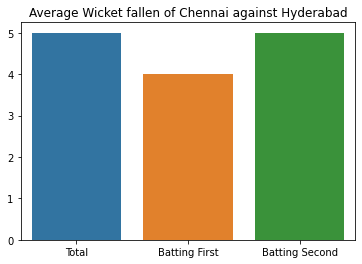

In [145]:
avg_chennai_wickets_per_match = pd.Series([avg_wicket_fallen_Chennai,avg_wicket_fallen_batting_first_Chennai,avg_wicket_fallen_batting_second_Chennai],index=['Total','Batting First','Batting Second'])
sns.barplot(x=avg_chennai_wickets_per_match.index,y=avg_chennai_wickets_per_match)
plt.title('Average Wicket fallen of Chennai against Hyderabad')
plt.show()

Chennai lost less wickets against Hyderabad while batting first. 

# Total Run in a match:

In [146]:
total_run = delivery['batsman_runs'].sum()
total_run

3966

Total 3966 runs made in Hyderabad vs Chennai match till now.

In [147]:
total_run_Chennai = delivery[delivery['batting_team'] == 'Chennai Super Kings']['batsman_runs'].sum()
total_run_Chennai

2034

Chennai scored total 2034 runs against Hyderabad till now.

In [148]:
total_run_Hyderabad = delivery[delivery['batting_team'] != 'Chennai Super Kings']['batsman_runs'].sum()
total_run_Hyderabad

1932

Hyderabad scored total 1932 runs against Chennai till now.

In [149]:
avg_run_per_match = math.ceil(total_run/total_matches_against_Hyderabad)
avg_run_per_match

331

331 runs in an average made in a match betwen Chennai and Hyderabad.

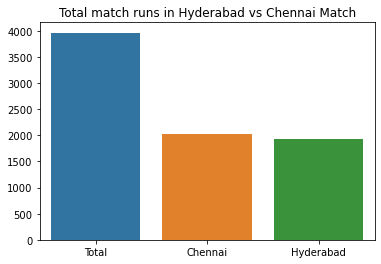

In [150]:
total_match_runs = pd.Series([total_run,total_run_Chennai,total_run_Hyderabad],index = ['Total','Chennai','Hyderabad'])
sns.barplot(x=total_match_runs.index,y=total_match_runs)
plt.title('Total match runs in Hyderabad vs Chennai Match')
plt.show()

Both scored almost same runs against each other.

# Hyderabad Home Ground:

In [151]:
match2.shape

(7, 18)

In [152]:
match2['winner'].value_counts()

Chennai Super Kings    6
Sunrisers Hyderabad    1
Name: winner, dtype: int64

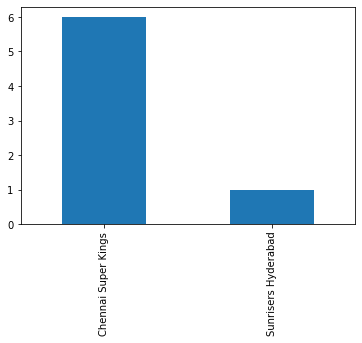

In [153]:
match2['winner'].value_counts().plot.bar()
plt.show()

Chennai won 6 times and Hyderabad won only 1 time against each other at Hyderabad home ground.

In [154]:
match2['toss_winner'].value_counts()

Chennai Super Kings    5
Sunrisers Hyderabad    2
Name: toss_winner, dtype: int64

In [155]:
match2['toss_decision'].value_counts()

field    5
bat      2
Name: toss_decision, dtype: int64

In [156]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts()

Chennai Super Kings    4
Name: winner, dtype: int64

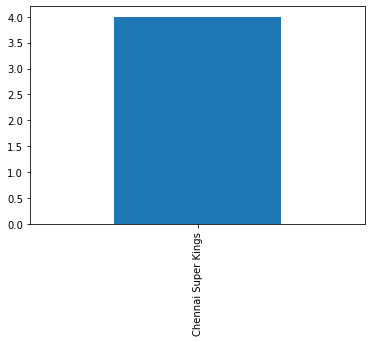

In [157]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts().plot.bar()
plt.show()

Chennai won 4 times after winning toss at Hyderabad home ground. That means whenever Chennai won the toss, they win against Hyderabad at their home ground.

In [158]:
delivery1 = df1[(df1['match_id'] == ids1[0]) | (df1['match_id'] == ids1[1]) | (df1['match_id'] == ids1[2]) | (df1['match_id'] == ids1[3]) | (df1['match_id'] == ids1[4]) | (df1['match_id'] == ids1[5]) | (df1['match_id'] == ids1[6])]
delivery1.head()

match_id  inning         batting_team         bowling_team  over  ball  \
97960       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     1   
97961       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     2   
97962       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     3   
97963       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     4   
97964       414       1  Sunrisers Hyderabad  Chennai Super Kings     1     5   

         batsman non_striker     bowler  is_super_over  ...  bye_runs  \
97960  Q de Kock    S Dhawan  MM Sharma              0  ...         0   
97961  Q de Kock    S Dhawan  MM Sharma              0  ...         0   
97962  Q de Kock    S Dhawan  MM Sharma              0  ...         0   
97963  GH Vihari    S Dhawan  MM Sharma              0  ...         0   
97964  GH Vihari    S Dhawan  MM Sharma              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
97960            0            0             0             0           0   
97961            0            0             0             4           0   
97962            0            0             0             0           0   
97963            0            0             0             0           0   
97964            0            0             0             1           0   

       total_runs  player_dismissed dismissal_kind  fielder  
97960           0               NaN            NaN      NaN  
97961           4               NaN            NaN      NaN  
97962           0         Q de Kock         caught  M Vijay  
97963           0               NaN            NaN      NaN  
97964           1               NaN            NaN      NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Hyderabad and Chennai at Hyderabad home ground.

## David Warner playing for Hyderabad at Hyderabad Home Ground:

In [159]:
total_run_David_Warner_srh_at_Hyderabad = delivery1[delivery1['batsman'] == 'DA Warner']['batsman_runs'].sum()
total_run_David_Warner_srh_at_Hyderabad

120

David Warner scored 120 runs against Chennai at Hyderabad home ground while playing for Hyderabad.

In [160]:
total_matches_against_Chennai_for_Hyderabad_at_Hyderabad = len(delivery1[delivery1['batsman'] == 'DA Warner']['match_id'].value_counts())
total_matches_against_Chennai_for_Hyderabad_at_Hyderabad

3

David Warner played 3 matches against Chennai and being in Hyderabad at Hyderabad home ground.

In [161]:
avg_run_David_Warner_srh_at_Hyderabad = math.ceil(total_run_David_Warner_srh_at_Hyderabad/total_matches_against_Chennai_for_Hyderabad_at_Hyderabad)
avg_run_David_Warner_srh_at_Hyderabad

40

David Warner scored an average of 40 per match against Chennai and being in Hyderabad at Hyderabad home ground.

In [162]:
total_run_David_Warner_batting_first_srh_at_Hyderabad = delivery1[(delivery1['batsman'] == 'DA Warner') & (delivery1['inning']==1)]['batsman_runs'].sum()
total_run_David_Warner_batting_first_srh_at_Hyderabad

120

David Warner scored 120 runs while batting in first inning at Hyderabad home ground.

In [163]:
total_matches_against_Chennai_for_Hyderabad_first_inning_at_Hyderabad = len(delivery1[(delivery1['batsman'] == 'DA Warner') & (delivery1['inning'] == 1)]['match_id'].value_counts())
total_matches_against_Chennai_for_Hyderabad_first_inning_at_Hyderabad

3

Total innings played against Chennai and being in Hyderabad batting first at Hyderabad home ground.

In [164]:
avg_run_David_Warner_srh_first_inning_at_Hyderabad = math.ceil(total_run_David_Warner_batting_first_srh_at_Hyderabad/total_matches_against_Chennai_for_Hyderabad_first_inning_at_Hyderabad)
avg_run_David_Warner_srh_first_inning_at_Hyderabad

40

David Warner scored an average of 40 per match against Chennai and being in Hyderabad batting first at Hyderabad.

In [165]:
total_run_David_Warner_batting_second_srh_at_Hyderabad = delivery1[(delivery1['batsman'] == 'DA Warner') & (delivery1['inning']==2)]['batsman_runs'].sum()
total_run_David_Warner_batting_second_srh_at_Hyderabad

0

David Warner didn't bat for Hyderabad in the second inning at Hyderabad home ground yet.

## Wide Balls at Hyderabad home ground :

In [166]:
total_wides_Hyderabad_home_ground = delivery1['wide_runs'].sum()
total_wides_Hyderabad_home_ground

54

Total 54 wide balls bowled at Hyderabad home ground.

In [167]:
wides_by_Hyderabad_Hyderabad_home_ground = delivery1[delivery1['bowling_team'] == 'Sunrisers Hyderabad']['wide_runs'].sum()
wides_by_Hyderabad_Hyderabad_home_ground

17

Hyderabad bowled 17 wides against Chennai at their home ground.

In [168]:
wides_by_Chennai_Hyderabad_home_ground = delivery1[delivery1['bowling_team'] != 'Sunrisers Hyderabad']['wide_runs'].sum()
wides_by_Chennai_Hyderabad_home_ground

37

Chennai bowled 37 wides against Hyderabad at Hyderabad home ground.

In [169]:
avg_wides_Hyderabad_home_ground = math.ceil(total_wides_Hyderabad_home_ground/len(ids1))
avg_wides_Hyderabad_home_ground

8

Average wides per match is 8.

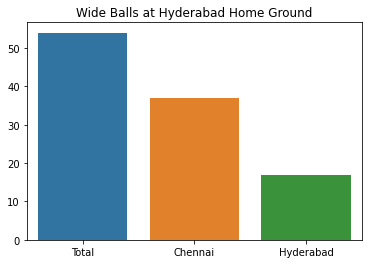

In [170]:
wides_at_Hyderabad = pd.Series([total_wides_Hyderabad_home_ground,wides_by_Chennai_Hyderabad_home_ground,wides_by_Hyderabad_Hyderabad_home_ground],index=['Total','Chennai','Hyderabad'])
sns.barplot(x=wides_at_Hyderabad.index,y=wides_at_Hyderabad)
plt.title('Wide Balls at Hyderabad Home Ground')
plt.show()

Hyderabad bowled less wide balls at Hyderabad home ground.

## Wickets at Hyderabad home ground:

In [171]:
total_wickets_fallen_Chennai_Hyderabad_home_ground = delivery1[(delivery1['batting_team'] == 'Chennai Super Kings')]['player_dismissed'].count()
total_wickets_fallen_Chennai_Hyderabad_home_ground

32

Total 32 wickets fallen of Chennai against Hyderabad at Hyderabad home ground.

In [172]:
total_matches_against_Hyderabad_Hyderabad_home_ground = len(delivery1['match_id'].value_counts())
total_matches_against_Hyderabad_Hyderabad_home_ground

7

Chennai played 7 matches against Hyderabad at Hyderabad home ground.

In [173]:
avg_wicket_fallen_Chennai_Hyderabad_home_ground = math.ceil(total_wickets_fallen_Chennai_Hyderabad_home_ground/total_matches_against_Hyderabad_Hyderabad_home_ground)
avg_wicket_fallen_Chennai_Hyderabad_home_ground

5

Chennai lost 5 wickets in an average per match against Hyderabad at Hyderabad home ground.

In [174]:
total_wickets_fallen_Chennai_batting_first_Hyderabad_home_ground = delivery1[(delivery1['batting_team'] == 'Chennai Super Kings') & (delivery1['inning'] == 1)]['player_dismissed'].count()
total_wickets_fallen_Chennai_batting_first_Hyderabad_home_ground

0

Chennai didn't bat first against Hyderabad at Hyderabad home ground.

In [175]:
total_wickets_fallen_Chennai_batting_second_Hyderabad_home_ground = delivery1[(delivery1['batting_team'] == 'Chennai Super Kings') & (delivery1['inning'] == 2)]['player_dismissed'].count()
total_wickets_fallen_Chennai_batting_second_Hyderabad_home_ground

32

Chennai lost 32 wickets against Hyderabad while batting second at Hyderabad Home Ground.

In [176]:
total_matches_batting_second_against_Hyderabad_Hyderabad_home_ground = len(delivery1[(delivery1['inning'] == 2) & (delivery1['batting_team'] == 'Chennai Super Kings')]['match_id'].value_counts())
total_matches_batting_second_against_Hyderabad_Hyderabad_home_ground

7

Chennai batted in second innings in 7 matches against Hyderabad at Hyderabad home ground.

In [177]:
avg_wicket_fallen_batting_second_Chennai_Hyderabad_home_ground = math.ceil(total_wickets_fallen_Chennai_batting_second_Hyderabad_home_ground/total_matches_batting_second_against_Hyderabad_Hyderabad_home_ground)
avg_wicket_fallen_batting_second_Chennai_Hyderabad_home_ground

5

Chennai lost 5 wickets in an average per match against Hyderabad while batting in second inning at Hyderabad home ground.

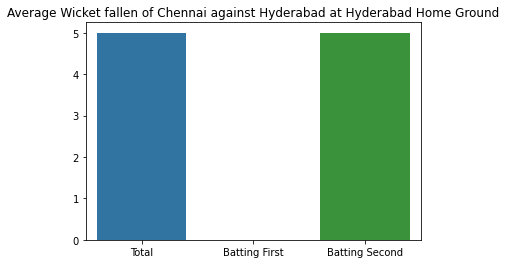

In [178]:
avg_chennai_wickets_per_match_st_Hyderabad = pd.Series([avg_wicket_fallen_Chennai_Hyderabad_home_ground,total_wickets_fallen_Chennai_batting_first_Hyderabad_home_ground,avg_wicket_fallen_batting_second_Chennai_Hyderabad_home_ground],index=['Total','Batting First','Batting Second'])
sns.barplot(x=avg_chennai_wickets_per_match_st_Hyderabad.index,y=avg_chennai_wickets_per_match_st_Hyderabad)
plt.title('Average Wicket fallen of Chennai against Hyderabad at Hyderabad Home Ground')
plt.show()

as Chennai didn't bat first at Hyderabad so, they lost 3 wickets in an average against Hyderabad at Hyderabad home ground.

## Total Run in a match at Hyderabad home ground:

In [179]:
total_run_Hyderabad_home_ground = delivery1['batsman_runs'].sum()
total_run_Hyderabad_home_ground

2274

Total 2274 runs made in Hyderabad vs Chennai match at Hyderabad home ground.

In [180]:
total_run_Chennai_Hyderabad_home_ground = delivery1[delivery1['batting_team'] == 'Chennai Super Kings']['batsman_runs'].sum()
total_run_Chennai_Hyderabad_home_ground

1136

Chennai scored total 1136 runs against Hyderabad at Hyderabad home ground.

In [181]:
total_run_Hyderabad_Hyderabad_home_ground = delivery1[delivery1['batting_team'] != 'Chennai Super Kings']['batsman_runs'].sum()
total_run_Hyderabad_Hyderabad_home_ground

1138

Hyderabad scored total 1138 runs against Chennai at Hyderabad home ground.

In [182]:
avg_run_per_match_Hyderabad_home_ground = math.ceil(total_run_Hyderabad_home_ground/total_matches_against_Hyderabad_Hyderabad_home_ground)
avg_run_per_match_Hyderabad_home_ground

325

325 runs in an average made in a match betwen Chennai and Hyderabad at Hyderabad home ground.

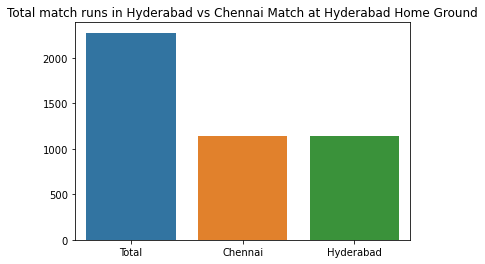

In [183]:
total_match_runs_at_Hyderabad = pd.Series([total_run_Hyderabad_home_ground,total_run_Chennai_Hyderabad_home_ground,total_run_Hyderabad_Hyderabad_home_ground],index = ['Total','Chennai','Hyderabad'])
sns.barplot(x=total_match_runs_at_Hyderabad.index,y=total_match_runs_at_Hyderabad)
plt.title('Total match runs in Hyderabad vs Chennai Match at Hyderabad Home Ground')
plt.show()

Both scored almost same runs against each other at Hyderabad Home Ground.